<a href="https://colab.research.google.com/github/EmirhanExecute/Stock-Price-Prediction-using-LSTM/blob/main/LSTM_PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=811634762864fb3060beff8d19ac551b0e19247e0593208ea91629a4992c46d5
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^RUI', start = '2013-03-11',end = '2023-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-03-11,860.859985,864.280029,859.469971,864.280029,864.280029,0
2013-03-12,863.669983,864.580017,859.909973,862.250000,862.250000,0
2013-03-13,861.969971,864.580017,860.020020,863.590027,863.590027,0
2013-03-14,864.640015,868.510010,864.640015,868.489990,868.489990,0
2013-03-15,868.619995,868.619995,864.419983,866.969971,866.969971,0
2013-03-18,864.109985,865.909973,858.320007,862.349976,862.349976,0
2013-03-19,863.539978,865.219971,854.820007,860.169983,860.169983,0
2013-03-20,862.200012,867.780029,862.200012,866.280029,866.280029,0
2013-03-21,863.809998,864.369995,857.840027,859.130005,859.130005,0


In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=50)
data['EMAS']=ta.ema(data.Close, length=50)
data['MOM']=ta.mom(data.Close, length= 50)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

<ipython-input-29-ee4c0c40ed44>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [ ]:
data_set = data.iloc[:, 0:12]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,MOM,Target,TargetClass,TargetNextClose
0,924.460022,929.140015,922.650024,926.080017,71.613180,903.942677,881.153535,881.153535,61.799988,-8.589966,0,917.650024
1,926.239990,935.539978,914.080017,917.650024,63.620839,905.248138,882.584770,882.584770,55.400024,1.010010,1,915.080017
2,914.070007,917.530029,906.520020,915.080017,61.383146,906.184508,883.859093,883.859093,51.489990,1.690002,1,914.289978
3,912.599976,914.299988,907.270020,914.289978,60.680194,906.956457,885.052461,885.052461,45.799988,2.609985,1,920.059998
4,917.450012,927.909973,917.140015,920.059998,63.913953,908.204414,886.425306,886.425306,53.090027,-6.570007,0,913.359985
5,919.929993,919.929993,908.549988,913.359985,57.981340,908.695420,887.481568,887.481568,51.010010,3.000000,1,917.030029
6,914.030029,920.940002,913.729980,917.030029,60.152114,909.489193,888.640331,888.640331,56.860046,-11.059998,0,904.440002
7,915.500000,919.599976,904.440002,904.440002,50.552874,909.008317,889.259926,889.259926,38.159973,3.549988,1,908.789978
8,905.239990,908.789978,899.289978,908.789978,53.311059,908.987523,890.025810,890.025810,49.659973,-5.080017,0,903.750000
9,908.830017,912.119995,899.559998,903.750000,49.858608,908.488711,890.564014,890.564014,38.840027,-10.989990,0,891.239990


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.02991489 0.0265473  0.03288299 ... 0.59139785 0.         0.02606467]
 [0.03090924 0.03012192 0.02809442 ... 0.62580636 1.         0.02462873]
 [0.02411067 0.02006269 0.02387021 ... 0.62824361 1.         0.02418732]
 ...
 [0.87490507 0.87102815 0.87695568 ... 0.61322568 0.         0.87376665]
 [0.8750671  0.86958708 0.87529059 ... 0.57075222 0.         0.86212271]
 [0.87004498 0.86391798 0.85758914 ... 0.61462315 0.         0.85970897]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 40
print(data_set_scaled.shape[0])
for j in range(9):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2548
[[[2.99148911e-02 2.65473047e-02 3.28829941e-02 ... 0.00000000e+00
   0.00000000e+00 5.93171951e-01]
  [3.09092424e-02 3.01219244e-02 2.80944244e-02 ... 8.35239072e-04
   8.35239072e-04 5.87299994e-01]
  [2.41106731e-02 2.00626923e-02 2.38702069e-02 ... 1.57890786e-03
   1.57890786e-03 5.83712544e-01]
  ...
  [3.43392648e-02 2.97197938e-02 3.76212604e-02 ... 1.09395350e-02
   1.09395350e-02 5.80088470e-01]
  [3.46297655e-02 2.91835855e-02 3.56656035e-02 ... 1.16286367e-02
   1.16286367e-02 5.68280215e-01]
  [3.29650123e-02 2.97030213e-02 3.69451496e-02 ... 1.23552520e-02
   1.23552520e-02 5.69032570e-01]]

 [[3.09092424e-02 3.01219244e-02 2.80944244e-02 ... 8.35239072e-04
   8.35239072e-04 5.87299994e-01]
  [2.41106731e-02 2.00626923e-02 2.38702069e-02 ... 1.57890786e-03
   1.57890786e-03 5.83712544e-01]
  [2.32894631e-02 1.82585929e-02 2.42892762e-02 ... 2.27533276e-03
   2.27533276e-03 5.78491976e-01]
  ...
  [3.46297655e-02 2.91835855e-02 3.56656035e-02 ... 1.16286367e-02
   1.

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2006
(2006, 40, 9)
(502, 40, 9)
(2006, 1)
(502, 1)
[[0.03792645]
 [0.03912773]
 [0.03823934]
 ...
 [0.87921984]
 [0.88236541]
 [0.87041987]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed


from keras.callbacks import Callback

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.best_loss = float('inf')

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('val_loss'))
        if logs.get('val_loss') < self.best_loss:
            self.best_loss = logs.get('val_loss')


lstm_input = Input(shape=(backcandles, 9), name='lstm_input')
inputs = LSTM(200, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
rmsprop = optimizers.RMSprop()
model.compile(optimizer= adam, loss='mean_absolute_percentage_error')
loss_history = LossHistory()
history = model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1, callbacks=[loss_history])

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 16.1780 - val_loss: 4.5928
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.8477 - val_loss: 2.2356
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1974 - val_loss: 6.4661
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7617 - val_loss: 3.4215
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3701 - val_loss: 2.7168
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.4894 - val_loss: 2.8484
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1740 - val_loss: 1.7715
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5865 - val_loss: 1.7873
Epoch 9/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.4990 - val_loss: 1.9613
Epoch 10/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2135 - val_loss: 1.7470
Epoch 11/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.5940 - val_loss: 1.7757
Epoch 12/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/st

In [ ]:
y_pred = model.predict(X_test)
#y_pred = np.round(y_pred)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[0.8885435] [0.88650553]
[0.87012756] [0.89025471]
[0.8957024] [0.88379579]
[0.90118945] [0.88317554]
[0.8924987] [0.87870012]
[0.89379233] [0.86905647]
[0.8874069] [0.84888648]
[0.8779406] [0.87078859]
[0.85150677] [0.88244917]
[0.8827148] [0.88476797]


In [ ]:
last_loss = loss_history.losses[-1]
best_loss = loss_history.best_loss
print("Last loss:", last_loss)
print("Best loss:", best_loss)

Last loss: 1.8158570528030396
Best loss: 1.7214370965957642


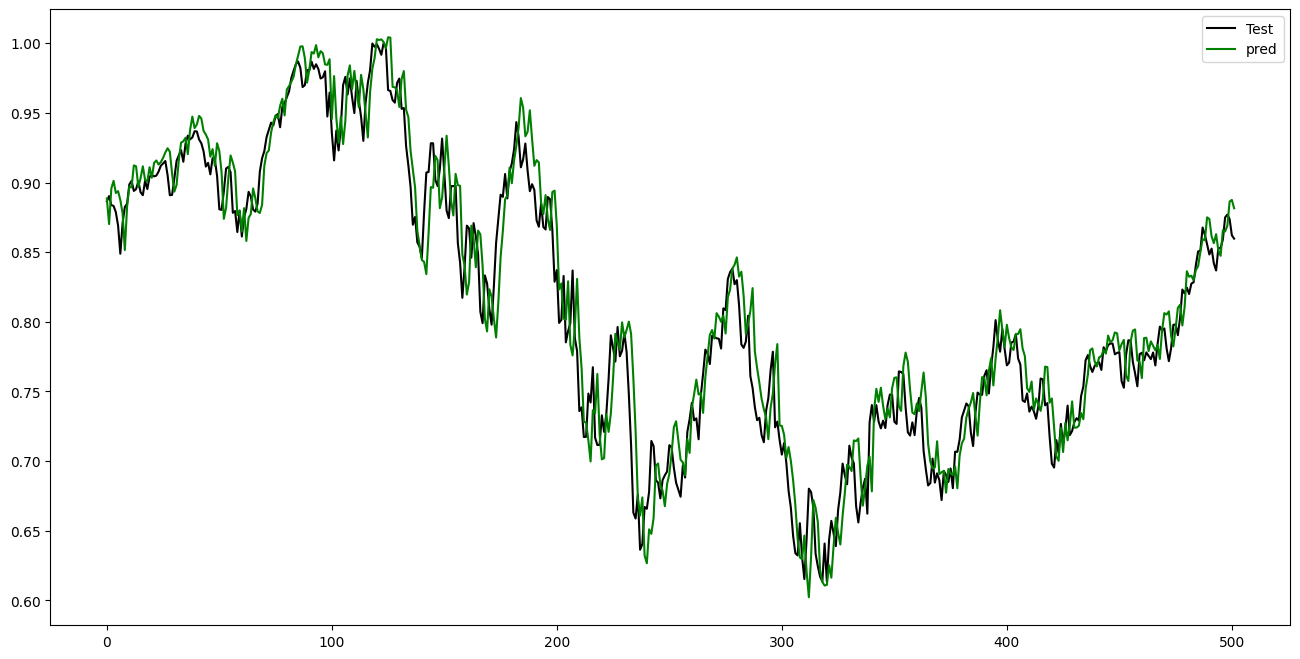

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.edited_losses = []
        self.edited_best_loss = float('inf')

    def on_epoch_end(self, epoch, logs={}):
        self.edited_losses.append(logs.get('val_loss'))
        if logs.get('val_loss') < self.edited_best_loss:
            self.edited_best_loss = logs.get('val_loss')


lstm_input = Input(shape=(backcandles, 9), name='lstm_input')
inputs = LSTM(100, name='first_layer')(lstm_input)
#inputs = Dropout(0.2, name ='lstm_dropout')(inputs)
inputs = Dense(32, name ='dense_layer_0')(inputs)
inputs = Activation('sigmoid', name ='sigmoid_0')(inputs)
inputs = Dense(1, name='dense_layer_1')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam()
rmsprop = optimizers.RMSprop()
model.compile(optimizer= adam, loss='mean_absolute_percentage_error')
loss_history = LossHistory()
history = model.fit(x=X_train, y=y_train, batch_size=16, epochs=50, shuffle=True, validation_split = 0.1, callbacks=[loss_history])

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 88.4320 - val_loss: 12.4384
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1683 - val_loss: 6.4669
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.9747 - val_loss: 6.6566
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9557 - val_loss: 5.8409
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.0402 - val_loss: 5.0473
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.8477 - val_loss: 6.9584
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.9352 - val_loss: 2.5684
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.3098 - val_loss: 3.5270
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7013 - val_loss: 2.2883
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2979 - val_loss: 5.9716
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0189 - val_loss: 4.9255
Epoch 12/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/s

In [ ]:
y_pred_v2 = model.predict(X_test)

for i in range(10):
    print(y_pred_v2[i], y_test[i])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[0.86260366] [0.88650553]
[0.8470614] [0.89025471]
[0.86653024] [0.88379579]
[0.87248313] [0.88317554]
[0.8663335] [0.87870012]
[0.86704195] [0.86905647]
[0.86143327] [0.84888648]
[0.8529342] [0.87078859]
[0.82895005] [0.88244917]
[0.85191214] [0.88476797]


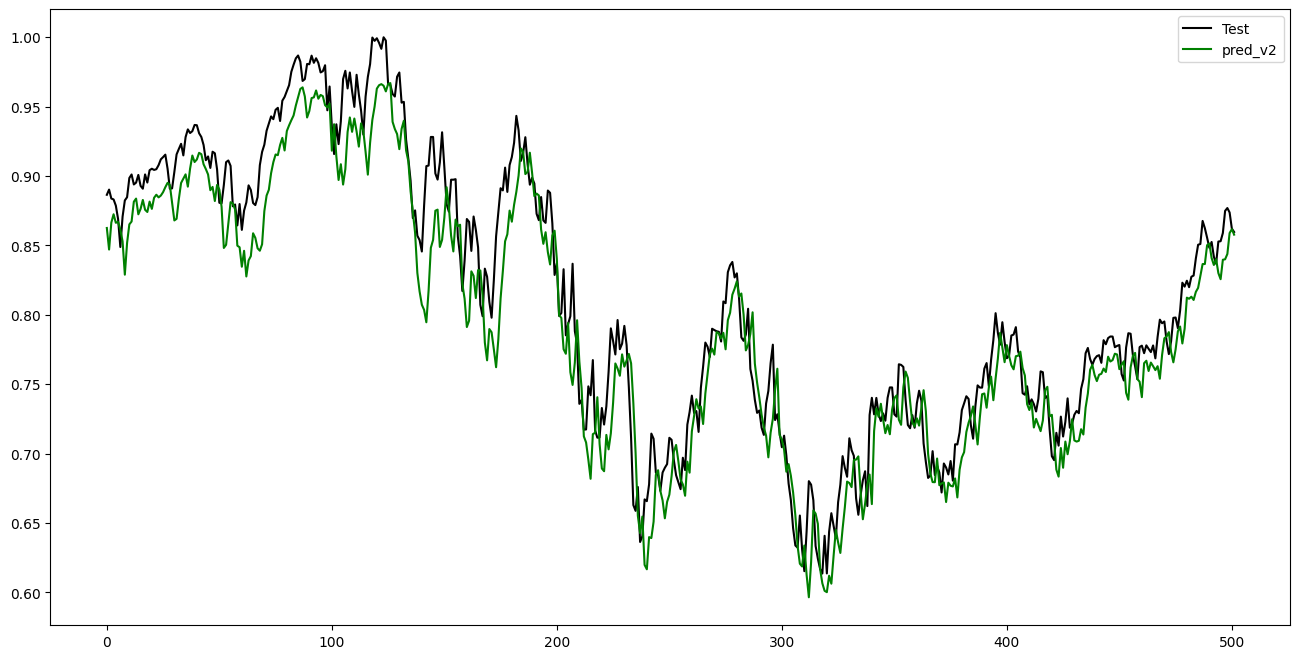

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred_v2, color = 'green', label = 'pred_v2')
plt.legend()
plt.show()

In [ ]:
#Comparison of the performance of two models with different structures
edited_last_loss = loss_history.edited_losses[-1]
edited_best_loss = loss_history.edited_best_loss
print( "Last val_loss of first model:", last_loss, "Last val_loss of new model:", edited_last_loss)
print("Best val_loss of first model:" , best_loss, "Best val_loss of new model:", edited_best_loss)

Last val_loss of first model: 1.8158570528030396 Last val_loss of new model: 2.2981929779052734
Best val_loss of first model: 1.7214370965957642 Best val_loss of new model: 1.693177580833435
